# Veri Analizi ve Araba Fiyat Tahminleme Çalışması

#### Veri bilimcilerin kullanması gereken platform: https://www.kaggle.com


## Veri Analizi

In [1]:
import seaborn as sbn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("merc.xlsx")

In [5]:
data.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [6]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


#### veri seti içinde null değer var mı? Kontrol edilmelidir.

In [11]:
data.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

## Grafik Ile Analiz

<Figure size 504x360 with 0 Axes>

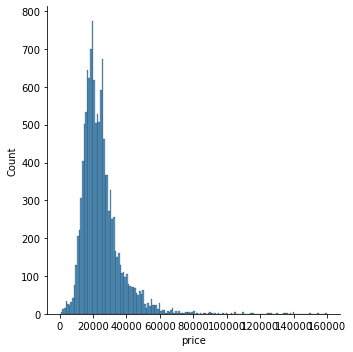

In [23]:
plt.figure(figsize=(7,5))
sbn.displot(data["price"])

/opt/anaconda3/envs/veriBilimi/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

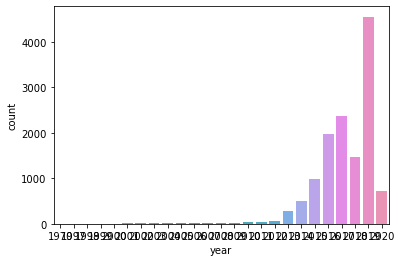

In [25]:
sbn.countplot(data["year"])

## Veriler Arası Korelasyon Incelenmeli

In [27]:
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


#### fiyat için korelasyon incelemesi;

In [29]:
data.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

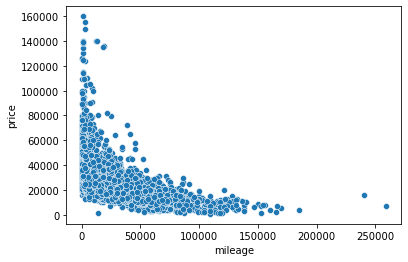

In [30]:
sbn.scatterplot(x="mileage", y="price", data=data)

## Fiyatları veya Değerleri Yükselen / Düşen Değerler Olarak Sıralama!

In [32]:
data.sort_values("price", ascending=False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [33]:
data.sort_values("price", ascending=True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [34]:
len(data)

13119

biz baktık ve pahalı araçların sayısı az bunlar analizi zorlaştıracak
biz de genel veriyi bozmadan bu işi düzeltiyoruz. %100 olan verimizin %1 ini alsak
sorun olmaz.

In [35]:
len(data) * 0.01

131.19

## Veriler Incelemesinden Sonra Kararımıza Göre Veri Temizliğinin Yapılması

#### Aldığımız karara göre daha isabetli sonuçlar için verinin %1'ini yani 131 adet yüksek fiyatlı aracın verisini setten sileceğiz.

In [39]:
yuzdeData = data.sort_values("price", ascending=False).iloc[131:]

In [41]:
yuzdeData.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


/opt/anaconda3/envs/veriBilimi/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

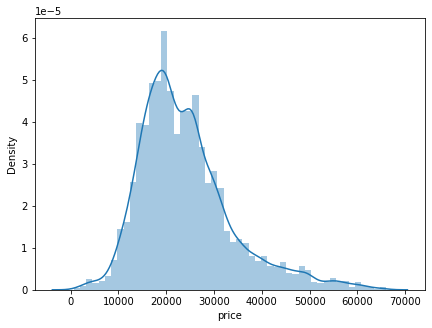

In [43]:
plt.figure(figsize=(7,5))
sbn.distplot(yuzdeData["price"])

In [44]:
yuzdeData.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

## Yıla göre inceledik 1970li arabalar fiyatı sıkıntılı çıkarılabilir!
### Bu verileri veri setimizden nasıl çıkaracağız?

In [45]:
yeniData = yuzdeData[yuzdeData["year"] != 1970].groupby("year").mean()["price"]

In [46]:
yeniData

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [49]:
yuzdeData = yuzdeData[yuzdeData.year != 1970]

In [50]:
yuzdeData

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


## Sonucu etkileyen kolon verisinin silinmesi

#### transmisson kısmı var data içinde bundan kurtulmak lazım.

In [52]:
yuzdeData = yuzdeData.drop("transmission", axis=1)

In [53]:
yuzdeData

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


# TENSORFLOW İŞLEMLERİ BAŞLIYOR

## MODEL OLUŞTURMA

In [54]:
y = yuzdeData["price"].values
x = yuzdeData.drop("price", axis = 1).values

In [55]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [56]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

# Test / Train ayrımı yapma evresi

In [57]:
from sklearn.model_selection import train_test_split

train ve test kısmı oluşturuyoruz. oluştururken önce x y sonra yüzde kaçı test alanı olacak veriyoruz.

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

doğru ayrılmış mı? test ediyoruz.

In [59]:
len(x_train)

9090

In [60]:
len(x_test)

3897

In [61]:
len(yuzdeData)

12987

## Verileri standartlaştırma, ölçeklendirme işlemi (scaling işlemi)

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
x_train = scaler.fit_transform(x_train)

In [65]:
x_test = scaler.fit_transform(x_test)

# TensorFlow Çağırıyoruz!

#### x , y oluştu test trainler oluştu artık eğitime geldi sıra

In [68]:
# bununla modelimizi oluşturacağız.
from tensorflow.keras.models import Sequential
# bununla katmanlarımızı oluşturacağız.
from tensorflow.keras.layers import Dense

#### içerisinde kaç özelliğimiz var, kaç datamız var bakmak için ;

In [69]:
x_train.shape

(9090, 5)

#### model oluşturalım

In [71]:
model = Sequential()

# katman ekleyelim şimdi
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

# çıkış katmanı ekleyeceğiz.
model.add(Dense(1))

# compile ederken optimizer seçmek lazım "adam" en iyisi
model.compile(optimizer="adam", loss="mse")

#### sıra modeli eğitmeye işlemine geldi!

In [72]:
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 250,epochs = 300)

2022-01-28 11:30:26.177271: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-28 11:30:26.179193: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 9090 samples, validate on 3897 samples
Epoch 1/300
9090/9090 [==============================] - 1s 83us/sample - loss: 672140417.4081 - val_loss: 688090370.4142
Epoch 2/300
9090/9090 [==============================] - 0s 11us/sample - loss: 672093069.7294 - val_loss: 688003425.0921
Epoch 3/300
9090/9090 [==============================] - 0s 10us/sample - loss: 671925870.1870 - val_loss: 687689006.4275
Epoch 4/300
9090/9090 [==============================] - 0s 10us/sample - loss: 671339875.1331 - val_loss: 686627555.7855
Epoch 5/300
9090/9090 [==============================] - 0s 9us/sample - loss: 669475399.8152 - val_loss: 683394065.9666
Epoch 6/300
9090/9090 [==============================] - 0s 9us/sample - loss: 664150576.3696 - val_loss: 674847310.1073
Epoch 7/300
9090/9090 [==============================] - 0s 10us/sample - loss: 651535267.1331 - val_loss: 656079823.7496
Epoch 8/300
9090/9090 [==============================] - 0s 9us/sample - loss: 625628607.2255 - val_

Epoch 136/300
9090/9090 [==============================] - 0s 9us/sample - loss: 22201881.1309 - val_loss: 26437777.0739
Epoch 137/300
9090/9090 [==============================] - 0s 9us/sample - loss: 22145693.5204 - val_loss: 26293860.6600
Epoch 138/300
9090/9090 [==============================] - 0s 9us/sample - loss: 22087952.8482 - val_loss: 26457598.3013
Epoch 139/300
9090/9090 [==============================] - 0s 9us/sample - loss: 22036904.6524 - val_loss: 26162722.9489
Epoch 140/300
9090/9090 [==============================] - 0s 9us/sample - loss: 21972304.9439 - val_loss: 27710323.2456
Epoch 141/300
9090/9090 [==============================] - 0s 9us/sample - loss: 21967124.8086 - val_loss: 26136005.6192
Epoch 142/300
9090/9090 [==============================] - 0s 9us/sample - loss: 21882532.4323 - val_loss: 26197043.5953
Epoch 143/300
9090/9090 [==============================] - 0s 10us/sample - loss: 21845793.7228 - val_loss: 27036268.0216
Epoch 144/300
9090/9090 [======

9090/9090 [==============================] - 0s 10us/sample - loss: 18929153.8240 - val_loss: 23244502.4732
Epoch 271/300
9090/9090 [==============================] - 0s 9us/sample - loss: 18948609.1089 - val_loss: 23008237.7670
Epoch 272/300
9090/9090 [==============================] - 0s 9us/sample - loss: 18907667.8163 - val_loss: 22847064.4527
Epoch 273/300
9090/9090 [==============================] - 0s 9us/sample - loss: 18908348.0330 - val_loss: 22585277.7454
Epoch 274/300
9090/9090 [==============================] - 0s 9us/sample - loss: 18911265.8130 - val_loss: 22350804.5073
Epoch 275/300
9090/9090 [==============================] - 0s 9us/sample - loss: 18882472.8537 - val_loss: 22343448.7236
Epoch 276/300
9090/9090 [==============================] - 0s 9us/sample - loss: 18902759.4642 - val_loss: 22666464.7909
Epoch 277/300
9090/9090 [==============================] - 0s 9us/sample - loss: 18845475.5611 - val_loss: 22933176.1499
Epoch 278/300
9090/9090 [====================

# Şimdi Eğitim Değerlendirmesi

### Eğitim sonuçlarını alıyoruz

In [73]:
kayipVeri = pd.DataFrame(model.history.history)

In [74]:
kayipVeri.head()

,loss,val_loss
0,6.721404e+08,6.880904e+08
1,6.720931e+08,6.880034e+08
2,6.719259e+08,6.876890e+08
3,6.713399e+08,6.866276e+08
4,6.694754e+08,6.833941e+08


### Grafikleştirip eğitimin kalitesine bakıyoruz.

<AxesSubplot:>

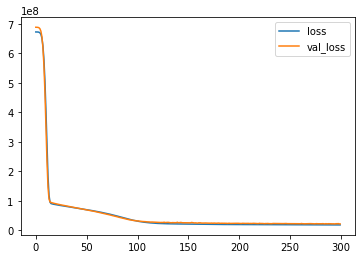

In [75]:
kayipVeri.plot()

## Sonuçların doğruluğuna bakacağız ardından karşılaştıracağız doğruluğunu.

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
tahmin = model.predict(x_test)

In [78]:
mean_absolute_error(y_test, tahmin)

3309.339127542959

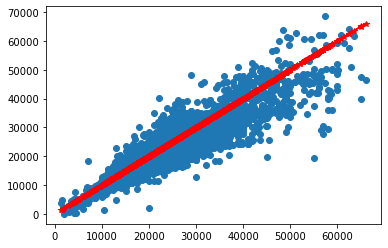

In [80]:
plt.scatter(y_test, tahmin)
plt.plot(y_test, y_test, "r-*")

In [82]:
yuzdeData.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [83]:
yeniAraba = yuzdeData.drop("price", axis=1).iloc[2]

In [84]:
yeniAraba

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [86]:
yeniAraba = scaler.transform(yeniAraba.values.reshape(-1, 5))

In [88]:
model.predict(yeniAraba)

array([[62471.]], dtype=float32)